# Audio Market Analysis: Advanced E-commerce Insights

## Executive Summary
This comprehensive analysis examines 2 months of audio product transaction data (21,108 transactions, ₹75.3M revenue) to provide strategic market insights for business leaders.

## Table of Contents
1. [Data Overview & Setup](#data-overview)
2. [Category & Brand Dynamics](#category-brand)
3. [Price Sensitivity Analysis](#price-sensitivity)
4. [Customer Behavior Analysis](#customer-behavior)
5. [Geographic Trends](#geographic-trends)
6. [Cohort & Retention Analysis](#cohort-retention)
7. [Strategic Insights & Recommendations](#recommendations)


# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    try:
        __import__(package)
        print(f"✅ {package} is already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")

# List of required packages
required_packages = [
    'pandas',
    'numpy',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

print("🔍 Checking and installing required packages...")
for package in required_packages:
    install_package(package)

print("\n" + "="*50)
print("🎯 All packages are ready!")
print("="*50)


In [3]:
## 1. Data Overview & Setup {#data-overview}

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from operator import attrgetter
import warnings
import os
import sys

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set up plotting style for better visualizations
plt.style.use('default')  # Use default style for better compatibility
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Set pandas display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✅ All libraries imported successfully!")
print("📊 Matplotlib backend:", plt.get_backend())
print("🐼 Pandas version:", pd.__version__)
print("🔢 NumPy version:", np.__version__)
print("📈 Seaborn version:", sns.__version__)
print("🤖 Scikit-learn version:", __import__('sklearn').__version__)


✅ All libraries imported successfully!
📊 Matplotlib backend: module://matplotlib_inline.backend_inline
🐼 Pandas version: 2.2.2
🔢 NumPy version: 2.0.2
📈 Seaborn version: 0.13.2
🤖 Scikit-learn version: 1.6.1


In [5]:
# Load and prepare the audio market data
print("🔄 Loading audio market data...")

# Check if data file exists
data_file = 'sample-data-audio - 2-months.csv'

try:
    # Prompt the user to upload the file
    from google.colab import files
    uploaded = files.upload()

    # Check if the file was uploaded
    if data_file not in uploaded:
        print(f"❌ Error: Data file '{data_file}' was not uploaded!")
        sys.exit(1)

    df = pd.read_csv(data_file)
    df['date'] = pd.to_datetime(df['date'])
    print("✅ Data loaded successfully!")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    sys.exit(1)

print(f"\n📊 Dataset Overview:")
print(f"• Total Transactions: {len(df):,}")
print(f"• Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"• Total Revenue: ₹{df['price'].sum():,.0f}")
print(f"• Unique Users: {df['user'].nunique():,}")
print(f"• Unique Products: {df['product_id'].nunique():,}")
print(f"• Unique Brands: {df['brand'].nunique():,}")
print(f"• Average Transaction Value: ₹{df['price'].mean():.0f}")
print(f"• Median Transaction Value: ₹{df['price'].median():.0f}")

print(f"\n📋 First 5 rows of the dataset:")
display(df.head())

🔄 Loading audio market data...


Saving sample-data-audio - 2-months.csv to sample-data-audio - 2-months.csv
✅ Data loaded successfully!

📊 Dataset Overview:
• Total Transactions: 21,108
• Date Range: 2024-09-01 to 2024-10-31
• Total Revenue: ₹75,311,192
• Unique Users: 13,900
• Unique Products: 3,320
• Unique Brands: 750
• Average Transaction Value: ₹3568
• Median Transaction Value: ₹1508

📋 First 5 rows of the dataset:


,date,user,pos_id,pos_name,product_id,product_name,generic_name,brand,gender_name,level1_name,level2_name,level3_name,pincode,city,state,country,price
0,2024-10-31,user-5628,63,Amazon,B0CY4GK1DJ,"SOULWIT Cooling Gel Replacement Ear Pads Cushions for Marshall Monitor2/MonitorII Over-Ear Headphones (Do Not Fit Monitor), Earpads with Noise Isolation Foam - Black",Ear Pads,SOULWIT,Unisex,Audio & Video,Headset,Headphones,NaN,NaN,NaN,NaN,1898
1,2024-10-31,user-3927,63,Amazon,B0BWVQKSSY,"JBL Tune 720BT Wireless Over Ear Headphones with Mic, Pure Bass Sound, Upto 76 Hrs Playtime, Speedcharge, Dual Pairing, Customizable Bass with Headphones App, Lightweight, Bluetooth 5.3 (Black)",Headphones,JBL,Unisex,Audio & Video,Headset,Headphones,NaN,NaN,NaN,NaN,4999
2,2024-10-31,user-962,63,Amazon,B07M6D9XMP,MMT ACOUSTIX(r) MISO 4 | Studio Monitor/Speaker Isolation Pads to reduce vibrations | Premium Acoustic Foam with Angle Adjuster | Set of 4 pcs...,Speaker Pads,MMT ACOUSTIX,Unisex,Audio & Video,Speakers,Home Audio,NaN,NaN,NaN,NaN,795
3,2024-10-31,user-6442,63,Amazon,B0B4DPX2J2,"Audio Array AM-C1 USB Condenser Microphone Kit | 192kHz/24bit | BoomArm, Pop Filter, Mic Cover, Shock Mount, Tripod",Microphone,Audio,Unisex,Audio & Video,Microphone,Microphone,NaN,NaN,NaN,NaN,2599
4,2024-10-31,user-1926,63,Amazon,B0DFD25RHG,"Kapture Soft Silicone Case Compatible with Oneplus Buds 3 Cover, oneplus Buds 3 case Cover with Hook, oneplus Earbuds 3 case Cover with Silicone 360° Protection Dust-Proof Shockproof (Superman)",Earbuds Case,Kapture,Unisex,Audio & Video,Headset,Headphones,NaN,NaN,NaN,NaN,299


In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Data Quality Assessment:
• Missing Geographic Data: 48,815 records
• Complete Geographic Records: 6,833 records
• Price Range: ₹-4400 - ₹124999
• Zero Price Transactions: 108

Platform Distribution:
• Amazon: 11,023 transactions (52.2%)
• Flipkart: 9,060 transactions (42.9%)
• Myntra: 1,002 transactions (4.7%)
• oneplus: 13 transactions (0.1%)
• Meesho: 7 transactions (0.0%)
• JioMart: 2 transactions (0.0%)
• Bestbuy: 1 transactions (0.0%)


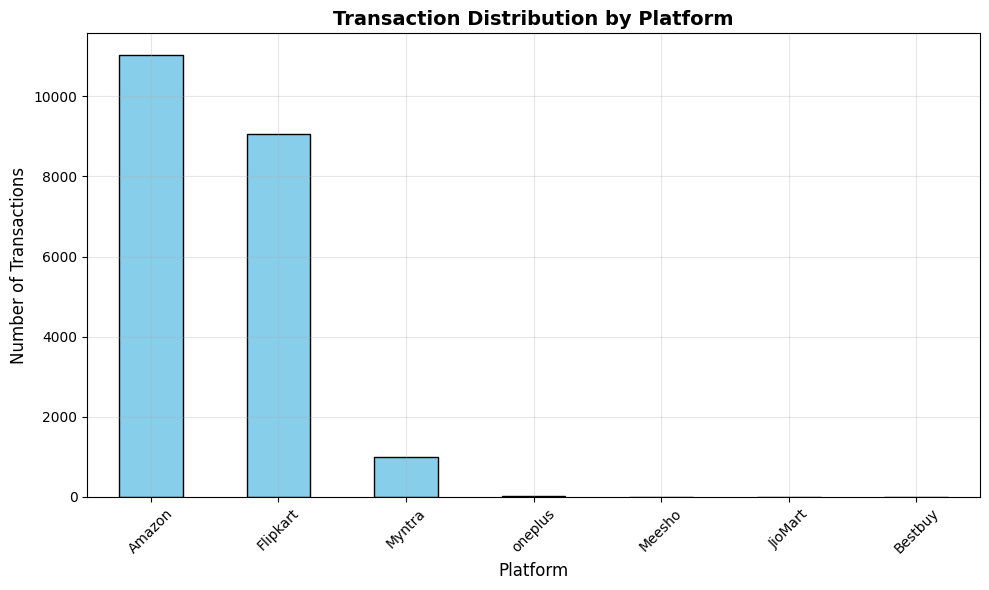

In [8]:
# Data quality check and platform distribution
print("Data Quality Assessment:")
print(f"• Missing Geographic Data: {df[['city', 'state', 'country']].isnull().sum().sum():,} records")
print(f"• Complete Geographic Records: {df.dropna(subset=['city', 'state']).shape[0]:,} records")
print(f"• Price Range: ₹{df['price'].min():.0f} - ₹{df['price'].max():.0f}")
print(f"• Zero Price Transactions: {(df['price'] == 0).sum()}")

# Platform distribution
platform_dist = df['pos_name'].value_counts()
print(f"\nPlatform Distribution:")
for platform, count in platform_dist.items():
    pct = (count / len(df)) * 100
    print(f"• {platform}: {count:,} transactions ({pct:.1f}%)")

# Visualize platform distribution
plt.figure(figsize=(10, 6))
platform_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transaction Distribution by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 2. Category & Brand Dynamics {#category-brand}


In [9]:
# Brand analysis with Pareto analysis
brand_analysis = df.groupby('brand').agg({
    'price': ['count', 'sum', 'mean'],
    'user': 'nunique'
}).round(2)
brand_analysis.columns = ['Transactions', 'Revenue', 'Avg_Price', 'Unique_Users']
brand_analysis = brand_analysis.sort_values('Revenue', ascending=False)

# Pareto analysis for brands
brand_analysis['Revenue_Pct'] = (brand_analysis['Revenue'] / brand_analysis['Revenue'].sum() * 100).round(2)
brand_analysis['Cumulative_Revenue_Pct'] = brand_analysis['Revenue_Pct'].cumsum()

print("Top 15 Brands by Revenue (Pareto Analysis):")
display(brand_analysis.head(15)[['Transactions', 'Revenue', 'Avg_Price', 'Revenue_Pct', 'Cumulative_Revenue_Pct']])

# 80/20 rule analysis
pareto_80_brands = brand_analysis[brand_analysis['Cumulative_Revenue_Pct'] <= 80]
print(f"\n80/20 Rule Analysis:")
print(f"• Top {len(pareto_80_brands)} brands generate 80% of revenue")
print(f"• These represent {len(pareto_80_brands)/len(brand_analysis)*100:.1f}% of all brands")


Top 15 Brands by Revenue (Pareto Analysis):


,Transactions,Revenue,Avg_Price,Revenue_Pct,Cumulative_Revenue_Pct
brand,,,,,
Sony,791,10154629,12837.71,13.48,13.48
JBL,1174,7607006,6479.56,10.10,23.58
boAt,3727,6864221,1841.76,9.11,32.69
Apple,407,6341475,15581.02,8.42,41.11
OnePlus,2043,4424013,2165.45,5.87,46.98
Bose,148,3784290,25569.53,5.02,52.00
ZEBRONICS,919,3490800,3798.48,4.64,56.64
SONY,310,3001677,9682.83,3.99,60.63
realme,1103,2255993,2045.32,3.00,63.63



80/20 Rule Analysis:
• Top 20 brands generate 80% of revenue
• These represent 2.7% of all brands


Category Analysis (Product Types):


,Transactions,Revenue,Avg_Price,Unique_Users
level3_name,,,,
Home Audio,3281,22874651,6971.85,2425
Earphones,9984,22399436,2243.53,7077
Headphones,3554,15508423,4363.65,2828
Portable Audio,2617,10561837,4035.86,2104
Headset,810,2146906,2650.50,674
Microphone,222,839876,3783.23,192
Speakers,106,211561,1995.86,94
Category 1943,132,196788,1490.82,131
Accessories,7,54346,7763.71,7


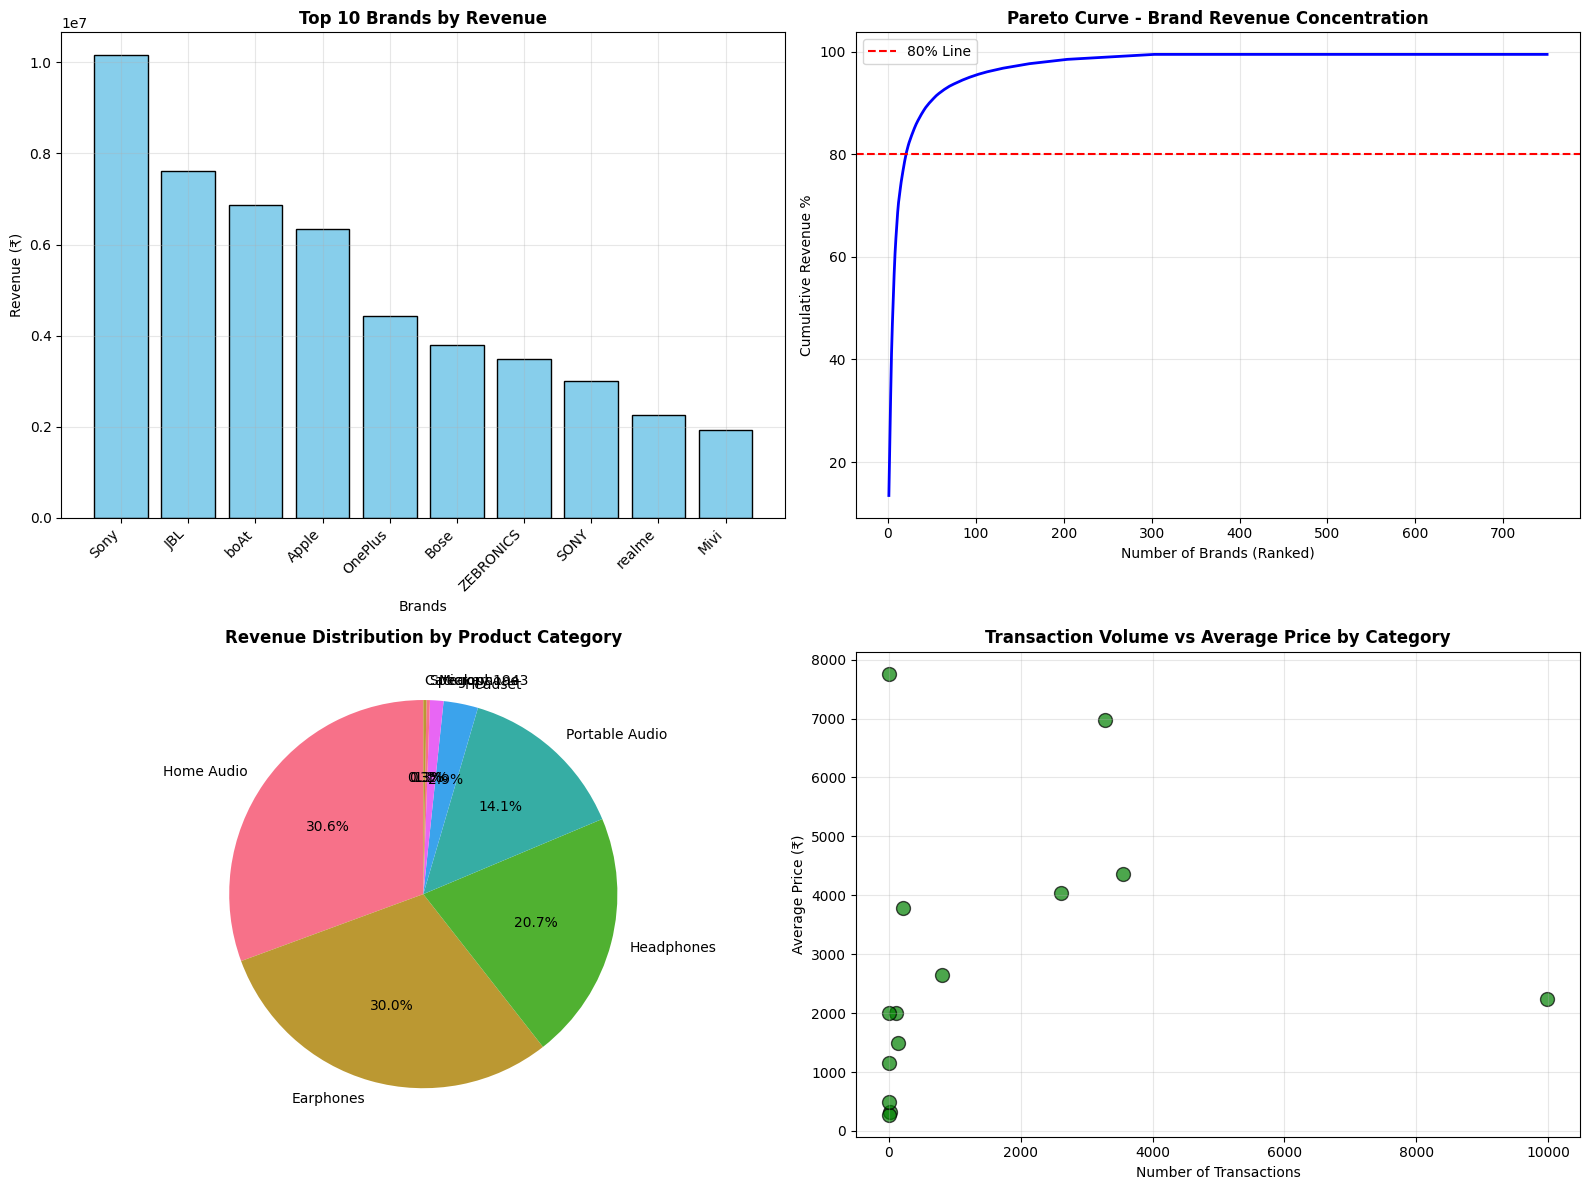

In [10]:
# Category analysis
category_analysis = df.groupby('level3_name').agg({
    'price': ['count', 'sum', 'mean'],
    'user': 'nunique'
}).round(2)
category_analysis.columns = ['Transactions', 'Revenue', 'Avg_Price', 'Unique_Users']
category_analysis = category_analysis.sort_values('Revenue', ascending=False)

print("Category Analysis (Product Types):")
display(category_analysis.head(10))

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top brands by revenue
top_brands = brand_analysis.head(10)
axes[0,0].bar(range(len(top_brands)), top_brands['Revenue'], color='skyblue', edgecolor='black')
axes[0,0].set_title('Top 10 Brands by Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Brands')
axes[0,0].set_ylabel('Revenue (₹)')
axes[0,0].set_xticks(range(len(top_brands)))
axes[0,0].set_xticklabels(top_brands.index, rotation=45, ha='right')
axes[0,0].grid(axis='y', alpha=0.3)

# Pareto curve for brands
axes[0,1].plot(range(1, len(brand_analysis)+1), brand_analysis['Cumulative_Revenue_Pct'], 'b-', linewidth=2)
axes[0,1].axhline(y=80, color='r', linestyle='--', label='80% Line')
axes[0,1].set_title('Pareto Curve - Brand Revenue Concentration', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Number of Brands (Ranked)')
axes[0,1].set_ylabel('Cumulative Revenue %')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Category distribution
top_categories = category_analysis.head(8)
axes[1,0].pie(top_categories['Revenue'], labels=top_categories.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Revenue Distribution by Product Category', fontsize=12, fontweight='bold')

# Transaction volume vs average price
axes[1,1].scatter(category_analysis['Transactions'], category_analysis['Avg_Price'],
                 s=100, alpha=0.7, color='green', edgecolor='black')
axes[1,1].set_title('Transaction Volume vs Average Price by Category', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Number of Transactions')
axes[1,1].set_ylabel('Average Price (₹)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Price Sensitivity Analysis {#price-sensitivity}


In [11]:
# Price distribution analysis
price_stats = df['price'].describe()
print("Price Distribution Statistics:")
print(f"• Min Price: ₹{price_stats['min']:.0f}")
print(f"• 25th Percentile: ₹{price_stats['25%']:.0f}")
print(f"• Median: ₹{price_stats['50%']:.0f}")
print(f"• 75th Percentile: ₹{price_stats['75%']:.0f}")
print(f"• Max Price: ₹{price_stats['max']:.0f}")
print(f"• Standard Deviation: ₹{price_stats['std']:.0f}")

# Price segments
df['price_segment'] = pd.cut(df['price'],
                            bins=[0, 1000, 3000, 10000, float('inf')],
                            labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

segment_analysis = df.groupby('price_segment').agg({
    'price': ['count', 'sum', 'mean'],
    'user': 'nunique'
}).round(2)
segment_analysis.columns = ['Transactions', 'Revenue', 'Avg_Price', 'Unique_Users']

print(f"\nPrice Segment Analysis:")
display(segment_analysis)


Price Distribution Statistics:
• Min Price: ₹-4400
• 25th Percentile: ₹899
• Median: ₹1508
• 75th Percentile: ₹2998
• Max Price: ₹124999
• Standard Deviation: ₹6051

Price Segment Analysis:


,Transactions,Revenue,Avg_Price,Unique_Users
price_segment,,,,
Budget,6478,4169574,643.65,4965
Mid-range,9328,16130612,1729.27,6759
Premium,3476,19905851,5726.65,2698
Luxury,1707,35149505,20591.39,1319


from matplotlib import pyplot as plt
segment_analysis['Transactions'].plot(kind='hist', bins=20, title='Transactions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Avg_Price'].plot(kind='hist', bins=20, title='Avg_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Unique_Users'].plot(kind='hist', bins=20, title='Unique_Users')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis.plot(kind='scatter', x='Transactions', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis.plot(kind='scatter', x='Revenue', y='Avg_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis.plot(kind='scatter', x='Avg_Price', y='Unique_Users', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Revenue']
  ys = series['Transactions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = segment_analysis.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('Transactions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Revenue']
  ys = series['Unique_Users']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = segment_analysis.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('Unique_Users')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Revenue']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Revenue'}, axis=1)
              .sort_values('Revenue', ascending=True))
  xs = counted['Revenue']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = segment_analysis.sort_values('Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Revenue')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Avg_Price']
  ys = series['Transactions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = segment_analysis.sort_values('Avg_Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Avg_Price')
_ = plt.ylabel('Transactions')

from matplotlib import pyplot as plt
segment_analysis['Transactions'].plot(kind='line', figsize=(8, 4), title='Transactions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Avg_Price'].plot(kind='line', figsize=(8, 4), title='Avg_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
segment_analysis['Unique_Users'].plot(kind='line', figsize=(8, 4), title='Unique_Users')
plt.gca().spines[['top', 'right']].set_visible(False)

Brand Price Elasticity (Coefficient of Variation):


,Transactions,Avg_Price,Price_Std,Unique_Users,Price_CV
brand,,,,,
Generic,244,894.18,2530.09,204,2.830
ZEBRONICS,919,3798.48,7199.61,772,1.895
JBL,1174,6479.56,9702.04,991,1.497
Zebronics,202,910.71,1170.97,175,1.286
Portronics,378,1309.13,1597.16,328,1.220
boAt,3727,1841.76,2073.74,2799,1.126
Mivi,692,2791.13,3031.86,561,1.086
Boult,643,1513.59,1616.86,518,1.068
Honeywell,54,1038.46,1089.47,48,1.049


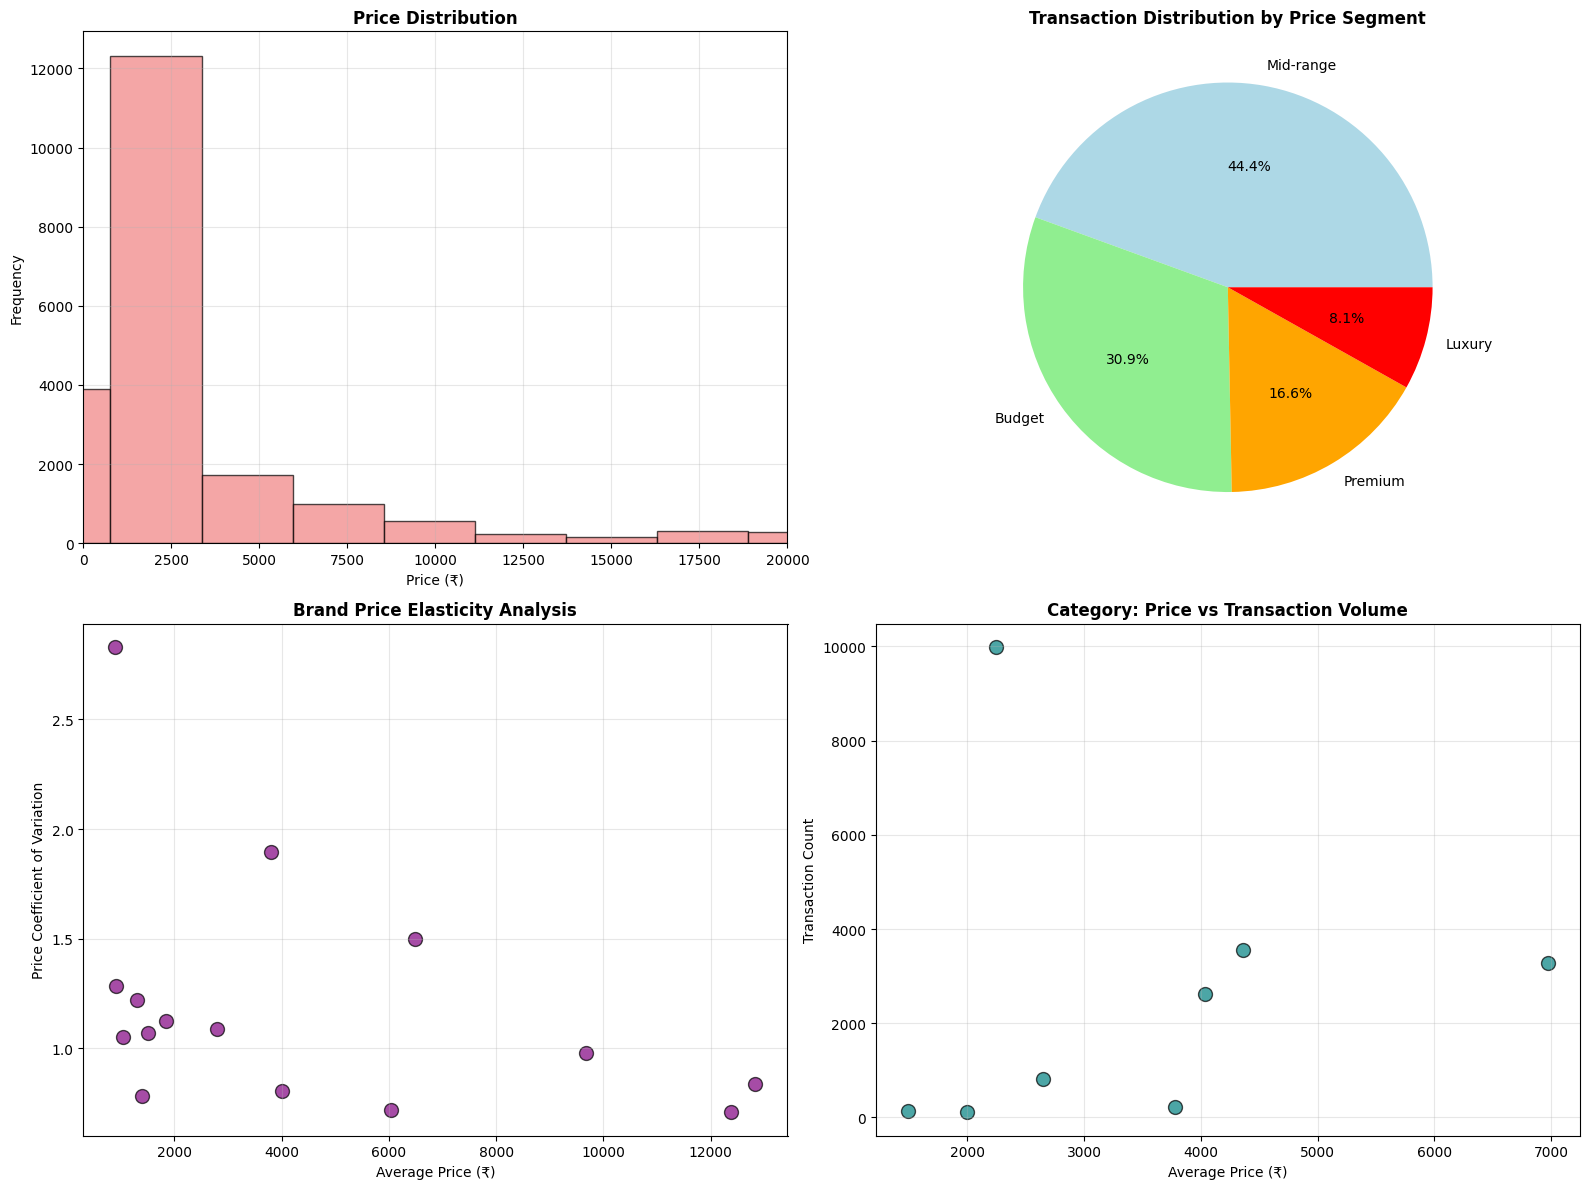

In [12]:
# Brand price elasticity analysis
brand_price_analysis = df.groupby('brand').agg({
    'price': ['count', 'mean', 'std'],
    'user': 'nunique'
}).round(2)
brand_price_analysis.columns = ['Transactions', 'Avg_Price', 'Price_Std', 'Unique_Users']
brand_price_analysis = brand_price_analysis[brand_price_analysis['Transactions'] >= 50]  # Filter for significant brands
brand_price_analysis['Price_CV'] = (brand_price_analysis['Price_Std'] / brand_price_analysis['Avg_Price']).round(3)
brand_price_analysis = brand_price_analysis.sort_values('Price_CV', ascending=False)

print("Brand Price Elasticity (Coefficient of Variation):")
display(brand_price_analysis.head(10))

# Create price sensitivity visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution histogram
axes[0,0].hist(df['price'], bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
axes[0,0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Price (₹)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlim(0, 20000)  # Limit x-axis for better visualization
axes[0,0].grid(axis='y', alpha=0.3)

# Price segments pie chart
segment_counts = df['price_segment'].value_counts()
axes[0,1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
              colors=['lightblue', 'lightgreen', 'orange', 'red'])
axes[0,1].set_title('Transaction Distribution by Price Segment', fontsize=12, fontweight='bold')

# Brand price elasticity scatter
top_brands_elasticity = brand_price_analysis.head(15)
axes[1,0].scatter(top_brands_elasticity['Avg_Price'], top_brands_elasticity['Price_CV'],
                 s=100, alpha=0.7, color='purple', edgecolor='black')
axes[1,0].set_title('Brand Price Elasticity Analysis', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Average Price (₹)')
axes[1,0].set_ylabel('Price Coefficient of Variation')
axes[1,0].grid(True, alpha=0.3)

# Price vs transaction volume by category
category_price_vol = df.groupby('level3_name').agg({
    'price': ['mean', 'count']
}).round(2)
category_price_vol.columns = ['Avg_Price', 'Transaction_Count']
category_price_vol = category_price_vol[category_price_vol['Transaction_Count'] >= 100]

axes[1,1].scatter(category_price_vol['Avg_Price'], category_price_vol['Transaction_Count'],
                 s=100, alpha=0.7, color='teal', edgecolor='black')
axes[1,1].set_title('Category: Price vs Transaction Volume', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Price (₹)')
axes[1,1].set_ylabel('Transaction Count')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Customer Behavior Analysis {#customer-behavior}


In [13]:
# RFM Analysis
rfm_data = df.groupby('user').agg({
    'date': 'max',  # Recency
    'user': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).rename(columns={'date': 'last_purchase', 'user': 'frequency', 'price': 'monetary'})

# Calculate recency (days since last purchase)
max_date = df['date'].max()
rfm_data['recency'] = (max_date - rfm_data['last_purchase']).dt.days

# RFM scoring (1-5 scale)
rfm_data['R_score'] = pd.qcut(rfm_data['recency'], 5, labels=[5,4,3,2,1])
rfm_data['F_score'] = pd.qcut(rfm_data['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_data['M_score'] = pd.qcut(rfm_data['monetary'], 5, labels=[1,2,3,4,5])

# Convert to numeric
rfm_data['R_score'] = rfm_data['R_score'].astype(int)
rfm_data['F_score'] = rfm_data['F_score'].astype(int)
rfm_data['M_score'] = rfm_data['M_score'].astype(int)

# RFM segments
def rfm_segment(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Champions'
    elif row['R_score'] >= 3 and row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'Loyal Customers'
    elif row['R_score'] >= 4 and row['F_score'] <= 2:
        return 'New Customers'
    elif row['R_score'] >= 3 and row['F_score'] >= 2 and row['M_score'] >= 2:
        return 'Potential Loyalists'
    elif row['R_score'] <= 2 and row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'At Risk'
    elif row['R_score'] <= 2 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Cannot Lose Them'
    elif row['R_score'] <= 2 and row['F_score'] <= 2 and row['M_score'] <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm_data['segment'] = rfm_data.apply(rfm_segment, axis=1)

# Segment analysis
segment_analysis = rfm_data.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)
segment_analysis['Customer_Count'] = rfm_data.groupby('segment').size()
segment_analysis.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
segment_analysis = segment_analysis.sort_values('Customer_Count', ascending=False)

print("RFM Customer Segments:")
display(segment_analysis)


RFM Customer Segments:


,Avg_Recency,Avg_Frequency,Avg_Monetary,Customer_Count
segment,,,,
Others,34.68,1.08,3194.28,3549
Loyal Customers,24.07,1.86,6762.79,2139
New Customers,15.33,1.00,3302.90,2110
At Risk,38.51,1.82,8785.39,1901
Champions,15.28,3.14,13966.36,1539
Potential Loyalists,22.95,1.18,2337.71,1337
Lost,42.90,1.00,920.14,1325


from matplotlib import pyplot as plt
_df_0['Avg_Recency'].plot(kind='hist', bins=20, title='Avg_Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Avg_Frequency'].plot(kind='hist', bins=20, title='Avg_Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Avg_Monetary'].plot(kind='hist', bins=20, title='Avg_Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Customer_Count'].plot(kind='hist', bins=20, title='Customer_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Avg_Recency', y='Avg_Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Avg_Frequency', y='Avg_Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Avg_Monetary', y='Customer_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Avg_Recency'].plot(kind='line', figsize=(8, 4), title='Avg_Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Avg_Frequency'].plot(kind='line', figsize=(8, 4), title='Avg_Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Avg_Monetary'].plot(kind='line', figsize=(8, 4), title='Avg_Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Customer_Count'].plot(kind='line', figsize=(8, 4), title='Customer_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Avg_Recency', y='segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Avg_Frequency', y='segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Avg_Monetary', y='segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Customer_Count', y='segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Customer Clusters:


,Avg_Recency,Avg_Frequency,Avg_Monetary,Customer_Count
cluster,,,,
0,35.81,1.33,3476.64,9104
1,11.36,1.49,3534.52,4002
2,20.50,47.40,143941.70,10
3,24.81,3.25,35810.36,784


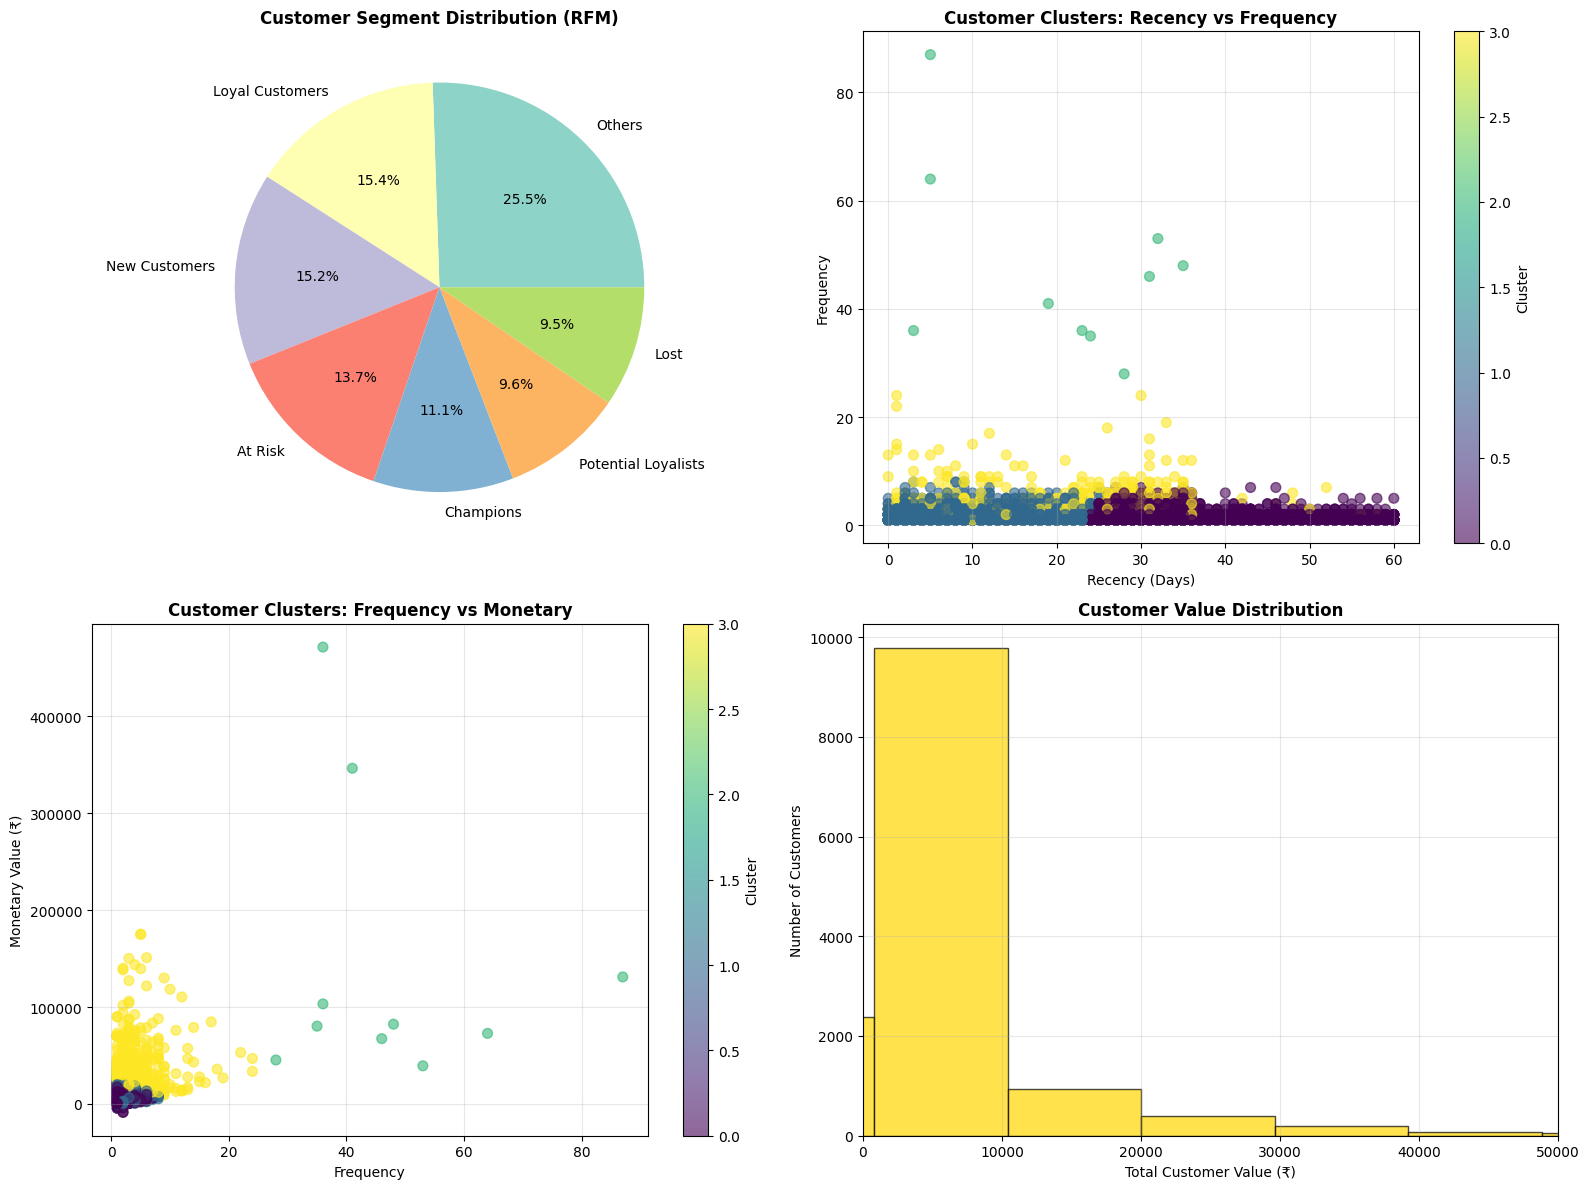

In [14]:
# Customer clustering
# Prepare data for clustering
clustering_data = rfm_data[['recency', 'frequency', 'monetary']].copy()
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

cluster_analysis = rfm_data.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)
cluster_analysis['Customer_Count'] = rfm_data.groupby('cluster').size()
cluster_analysis.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']

print("Customer Clusters:")
display(cluster_analysis)

# Create customer behavior visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RFM segments distribution
segment_counts = rfm_data['segment'].value_counts()
axes[0,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
              colors=plt.cm.Set3.colors)
axes[0,0].set_title('Customer Segment Distribution (RFM)', fontsize=12, fontweight='bold')

# Recency vs Frequency scatter
scatter = axes[0,1].scatter(rfm_data['recency'], rfm_data['frequency'],
                           c=rfm_data['cluster'], alpha=0.6, cmap='viridis', s=50)
axes[0,1].set_title('Customer Clusters: Recency vs Frequency', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Recency (Days)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0,1], label='Cluster')

# Frequency vs Monetary scatter
scatter2 = axes[1,0].scatter(rfm_data['frequency'], rfm_data['monetary'],
                            c=rfm_data['cluster'], alpha=0.6, cmap='viridis', s=50)
axes[1,0].set_title('Customer Clusters: Frequency vs Monetary', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Frequency')
axes[1,0].set_ylabel('Monetary Value (₹)')
axes[1,0].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1,0], label='Cluster')

# Customer value distribution
axes[1,1].hist(rfm_data['monetary'], bins=50, alpha=0.7, edgecolor='black', color='gold')
axes[1,1].set_title('Customer Value Distribution', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Total Customer Value (₹)')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xlim(0, 50000)  # Limit for better visualization
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Geographic Trends {#geographic-trends}


In [15]:
# Filter data with geographic information
geo_df = df.dropna(subset=['city', 'state'])
print(f"Geographic Analysis based on {len(geo_df):,} records with location data")

# State analysis
state_analysis = geo_df.groupby('state').agg({
    'price': ['count', 'sum', 'mean'],
    'user': 'nunique',
    'product_id': 'nunique'
}).round(2)
state_analysis.columns = ['Transactions', 'Revenue', 'Avg_Price', 'Unique_Users', 'Unique_Products']
state_analysis = state_analysis.sort_values('Revenue', ascending=False)

print("\nTop 10 States by Revenue:")
display(state_analysis.head(10))

# City analysis
city_analysis = geo_df.groupby('city').agg({
    'price': ['count', 'sum', 'mean'],
    'user': 'nunique'
}).round(2)
city_analysis.columns = ['Transactions', 'Revenue', 'Avg_Price', 'Unique_Users']
city_analysis = city_analysis[city_analysis['Transactions'] >= 50]  # Filter for significant cities
city_analysis = city_analysis.sort_values('Revenue', ascending=False)

print("\nTop 10 Cities by Revenue (min 50 transactions):")
display(city_analysis.head(10))


Geographic Analysis based on 6,833 records with location data

Top 10 States by Revenue:


,Transactions,Revenue,Avg_Price,Unique_Users,Unique_Products
state,,,,,
Maharashtra,744,2239084,3009.52,463,294
Uttar Pradesh,780,1994880,2557.54,502,327
West Bengal,750,1677069,2236.09,437,313
Tamil Nadu,526,1619601,3079.09,342,242
Karnataka,440,1585138,3602.59,318,227
Telangana,331,1301686,3932.59,239,174
Andhra Pradesh,252,1295777,5141.97,163,113
Delhi,430,1222659,2843.39,286,212
Bihar,430,985899,2292.79,273,203



Top 10 Cities by Revenue (min 50 transactions):


,Transactions,Revenue,Avg_Price,Unique_Users
city,,,,
New Delhi,334,1016971,3044.82,226
Hyderabad,222,974735,4390.70,165
Bengaluru,211,934203,4427.50,162
Chennai,151,394618,2613.36,109
Pune,74,365264,4936.00,62
Mumbai,139,331370,2383.96,73
Kolkata,163,327470,2009.02,84
Jaipur,83,207436,2499.23,42
Gurugram,58,184327,3178.05,36


Brand Preferences by Top 5 States (normalized):


brand,7store,AKG,AMS,ARFIRE,ASUS,Ahuja,Akshita,Apple,Aroma,Artis
state,,,,,,,,,,
Karnataka,0.000000,0.000000,0.002273,0.000000,0.000000,0.000000,0.000000,0.054545,0.000000,0.000000
Maharashtra,0.000000,0.002688,0.000000,0.000000,0.001344,0.001344,0.000000,0.047043,0.000000,0.000000
Tamil Nadu,0.000000,0.005703,0.001901,0.000000,0.000000,0.000000,0.000000,0.032319,0.005703,0.001901
Uttar Pradesh,0.000000,0.002564,0.000000,0.000000,0.002564,0.001282,0.001282,0.021795,0.001282,0.000000
West Bengal,0.001333,0.000000,0.000000,0.001333,0.000000,0.000000,0.000000,0.025333,0.000000,0.000000


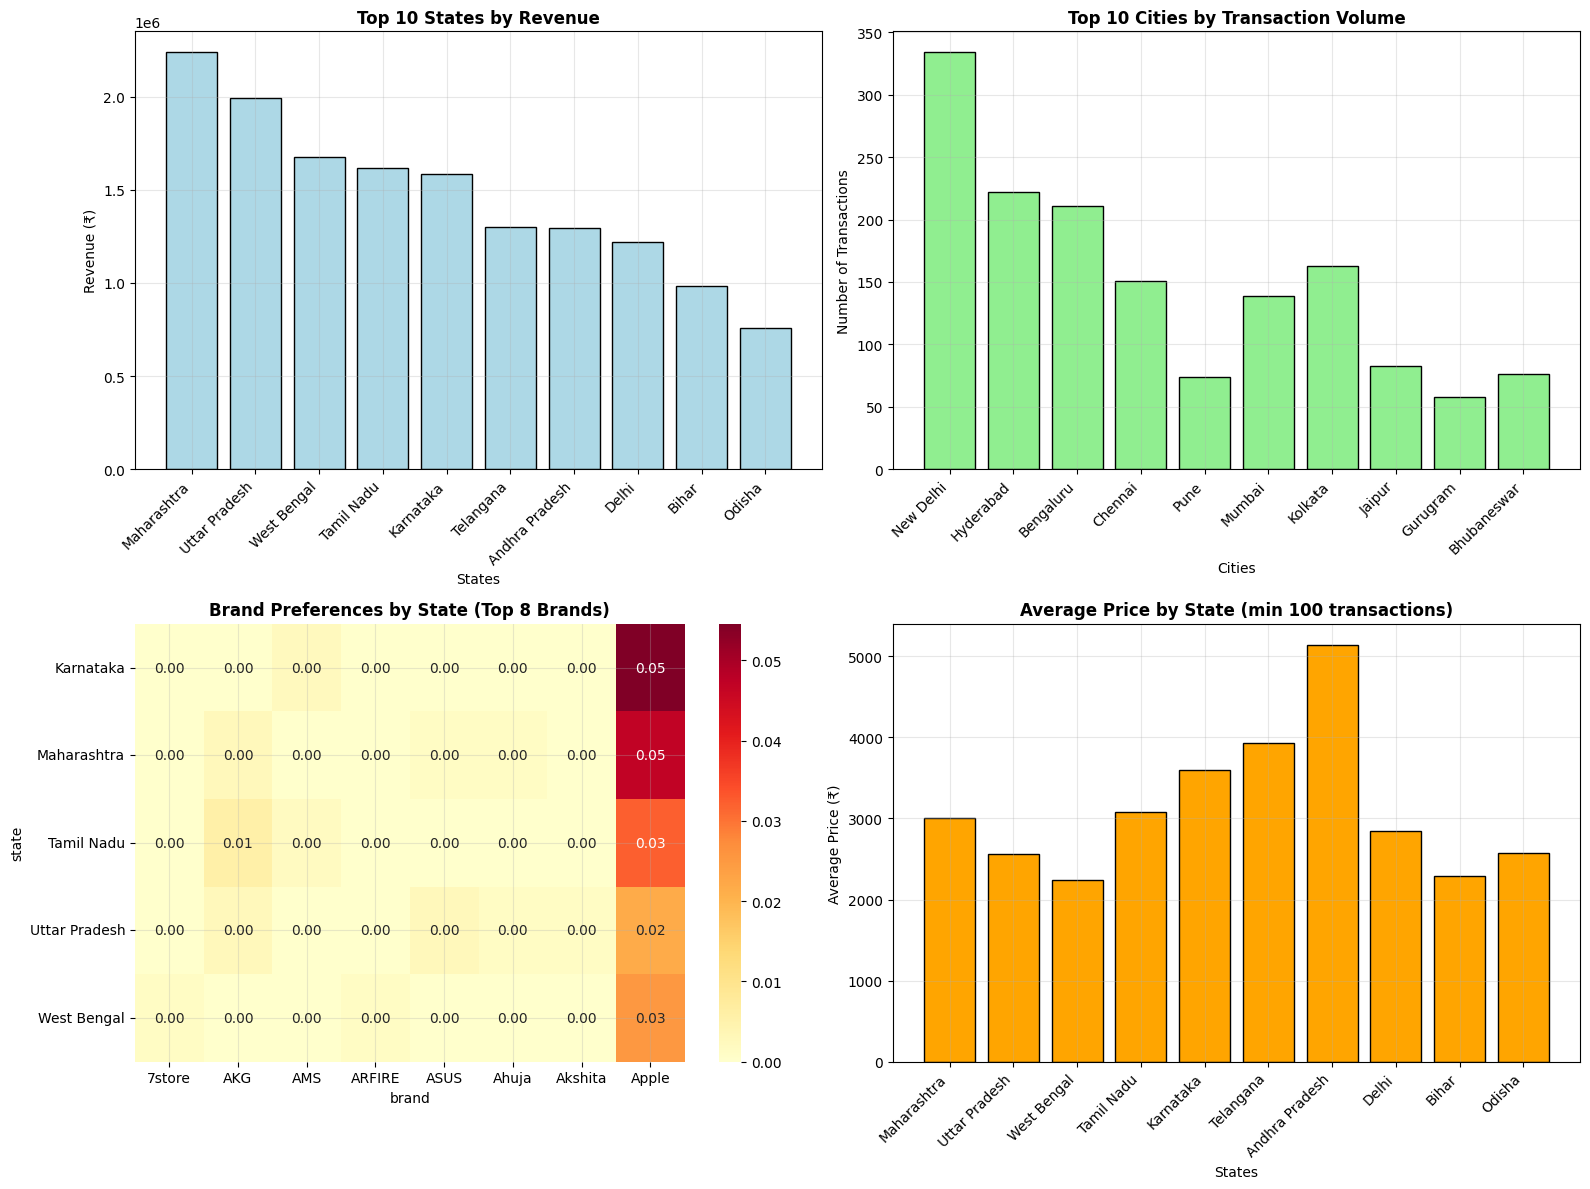

In [16]:
# Brand preferences by region
top_states = state_analysis.head(5).index
regional_brand_prefs = geo_df[geo_df['state'].isin(top_states)].groupby(['state', 'brand']).size().unstack(fill_value=0)
regional_brand_prefs = regional_brand_prefs.div(regional_brand_prefs.sum(axis=1), axis=0)  # Normalize

print("Brand Preferences by Top 5 States (normalized):")
display(regional_brand_prefs[regional_brand_prefs.columns[:10]])  # Show top 10 brands

# Create geographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# State revenue bar chart
top_states_revenue = state_analysis.head(10)
axes[0,0].bar(range(len(top_states_revenue)), top_states_revenue['Revenue'],
              color='lightblue', edgecolor='black')
axes[0,0].set_title('Top 10 States by Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('States')
axes[0,0].set_ylabel('Revenue (₹)')
axes[0,0].set_xticks(range(len(top_states_revenue)))
axes[0,0].set_xticklabels(top_states_revenue.index, rotation=45, ha='right')
axes[0,0].grid(axis='y', alpha=0.3)

# City transaction volume
top_cities = city_analysis.head(10)
axes[0,1].bar(range(len(top_cities)), top_cities['Transactions'],
              color='lightgreen', edgecolor='black')
axes[0,1].set_title('Top 10 Cities by Transaction Volume', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Cities')
axes[0,1].set_ylabel('Number of Transactions')
axes[0,1].set_xticks(range(len(top_cities)))
axes[0,1].set_xticklabels(top_cities.index, rotation=45, ha='right')
axes[0,1].grid(axis='y', alpha=0.3)

# Regional brand preferences heatmap
top_brands_for_heatmap = regional_brand_prefs.columns[:8]
heatmap_data = regional_brand_prefs[top_brands_for_heatmap]
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Brand Preferences by State (Top 8 Brands)', fontsize=12, fontweight='bold')

# Average price by state
state_avg_price = state_analysis[state_analysis['Transactions'] >= 100].head(10)
axes[1,1].bar(range(len(state_avg_price)), state_avg_price['Avg_Price'],
              color='orange', edgecolor='black')
axes[1,1].set_title('Average Price by State (min 100 transactions)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('States')
axes[1,1].set_ylabel('Average Price (₹)')
axes[1,1].set_xticks(range(len(state_avg_price)))
axes[1,1].set_xticklabels(state_avg_price.index, rotation=45, ha='right')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Cohort & Retention Analysis {#cohort-retention}


In [17]:
# Create cohorts based on first purchase month
df['order_month'] = df['date'].dt.to_period('M')
df['cohort_month'] = df.groupby('user')['date'].transform('min').dt.to_period('M')

# Calculate cohort periods
df['period_number'] = (df['order_month'] - df['cohort_month']).apply(attrgetter('n'))

# Cohort table
cohort_table = df.groupby(['cohort_month', 'period_number'])['user'].nunique().reset_index()
cohort_counts = cohort_table.pivot(index='cohort_month', columns='period_number', values='user')

# Calculate retention rates
cohort_sizes = cohort_counts.iloc[:, 0]
retention_table = cohort_counts.divide(cohort_sizes, axis=0)

print("Cohort Retention Rates:")
display(retention_table.round(3))

# Average retention by period
avg_retention = retention_table.mean()
print("\nAverage Retention by Period:")
for period, rate in avg_retention.items():
    print(f"• Period {period}: {rate:.1%}")


Cohort Retention Rates:


period_number,0,1
cohort_month,,
2024-09,1.0,0.142
2024-10,1.0,NaN



Average Retention by Period:
• Period 0: 100.0%
• Period 1: 14.2%


Platform-specific Cohort Sizes:

Amazon:


period_number,0,1
cohort_month,,
2024-09,4614.0,577.0
2024-10,3581.0,0.0



Flipkart:


period_number,0,1
cohort_month,,
2024-09,3679.0,641.0
2024-10,1970.0,0.0



Myntra:


period_number,0,1
cohort_month,,
2024-09,276.0,33.0
2024-10,108.0,0.0



Meesho:


period_number,0,1
cohort_month,,
2024-09,5.0,0.0
2024-10,2.0,0.0



oneplus:


period_number,0,1
cohort_month,,
2024-09,4.0,1.0



Bestbuy:


period_number,0,1
cohort_month,,
2024-10,1.0,0.0



JioMart:


period_number,0,1
cohort_month,,
2024-09,1.0,0.0
2024-10,1.0,0.0


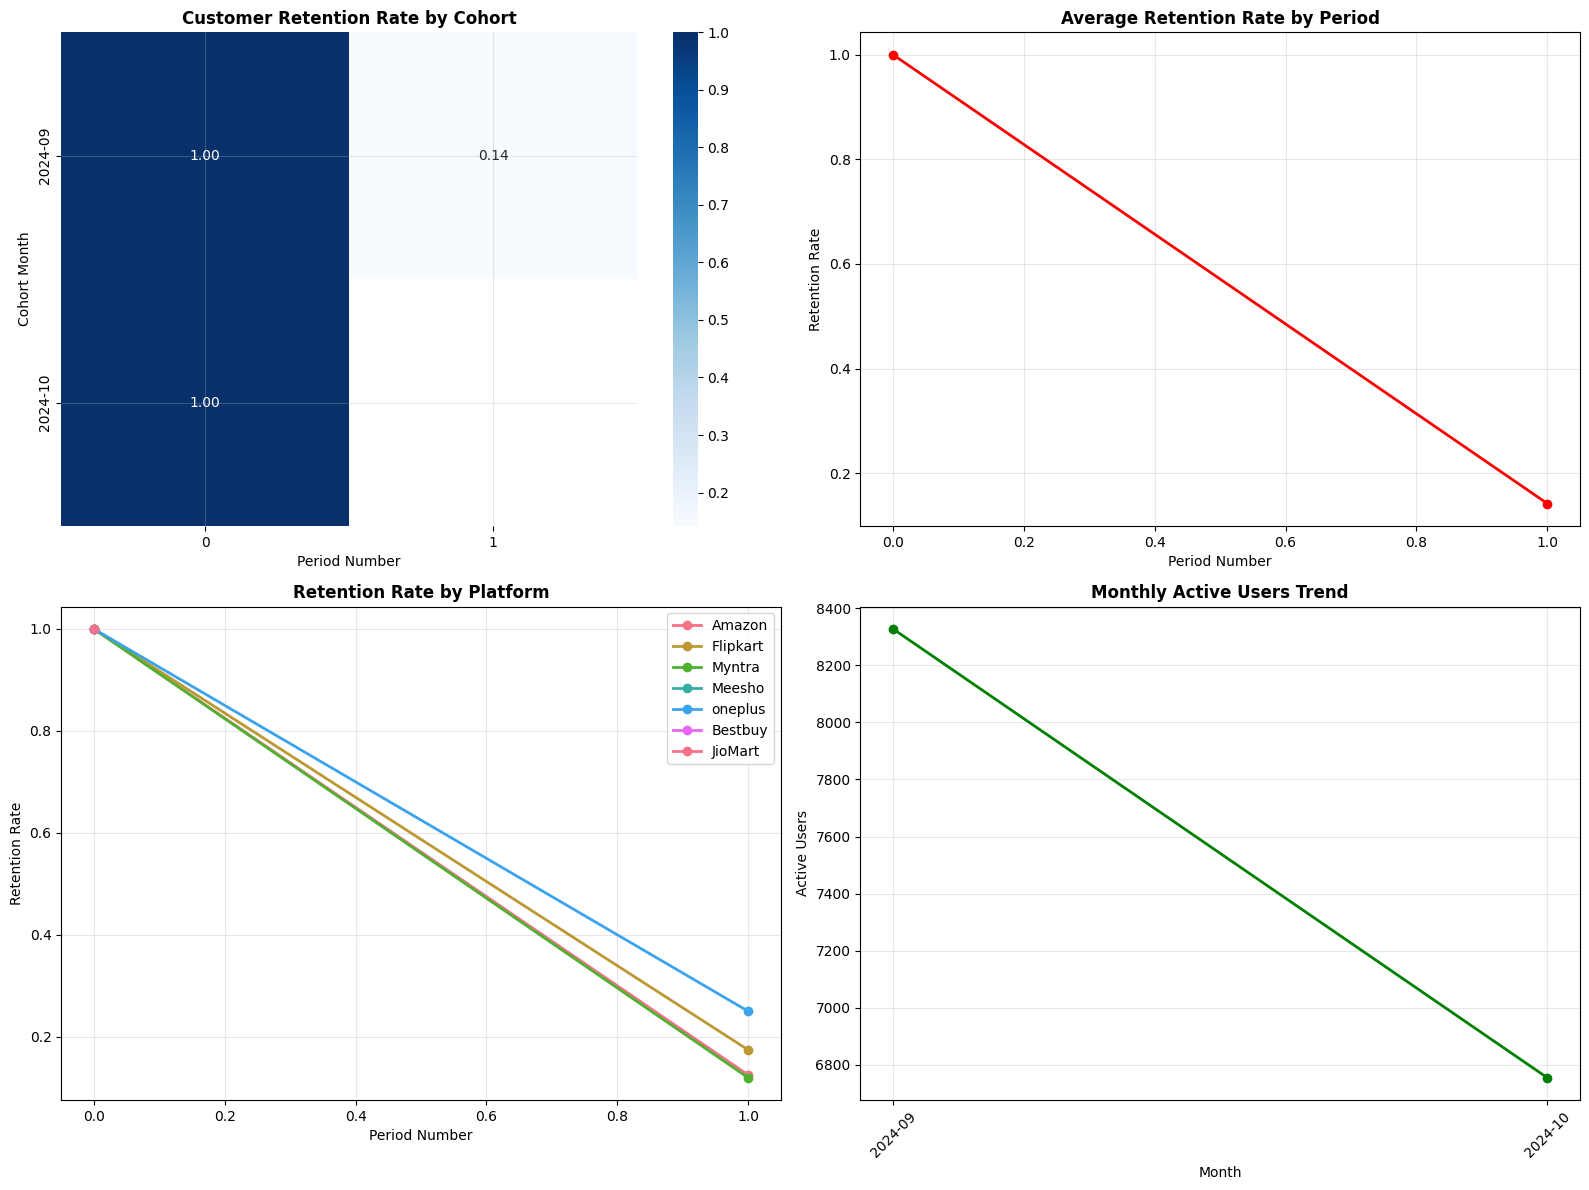

In [18]:
# Platform-specific cohorts
platform_cohorts = df.groupby(['pos_name', 'cohort_month', 'period_number'])['user'].nunique().reset_index()
platform_cohort_counts = platform_cohorts.pivot_table(index=['pos_name', 'cohort_month'],
                                                     columns='period_number', values='user', fill_value=0)

print("Platform-specific Cohort Sizes:")
for platform in df['pos_name'].unique():
    platform_data = platform_cohort_counts.loc[platform]
    print(f"\n{platform}:")
    display(platform_data.head())

# Create cohort and retention visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cohort retention heatmap
sns.heatmap(retention_table, annot=True, fmt='.2f', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Customer Retention Rate by Cohort', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Period Number')
axes[0,0].set_ylabel('Cohort Month')

# Average retention curve
axes[0,1].plot(avg_retention.index, avg_retention.values, marker='o', linewidth=2, color='red')
axes[0,1].set_title('Average Retention Rate by Period', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Period Number')
axes[0,1].set_ylabel('Retention Rate')
axes[0,1].grid(True, alpha=0.3)

# Platform comparison
platform_retention = {}
for platform in df['pos_name'].unique():
    platform_data = df[df['pos_name'] == platform]
    platform_cohort = platform_data.groupby(['cohort_month', 'period_number'])['user'].nunique().reset_index()
    platform_cohort_pivot = platform_cohort.pivot(index='cohort_month', columns='period_number', values='user')
    if not platform_cohort_pivot.empty:
        platform_retention[platform] = platform_cohort_pivot.divide(platform_cohort_pivot.iloc[:, 0], axis=0).mean()

for platform, retention in platform_retention.items():
    axes[1,0].plot(retention.index, retention.values, marker='o', label=platform, linewidth=2)
axes[1,0].set_title('Retention Rate by Platform', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Period Number')
axes[1,0].set_ylabel('Retention Rate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Monthly transaction trends
monthly_trends = df.groupby('order_month').agg({
    'user': 'nunique',
    'price': 'sum'
})
axes[1,1].plot(monthly_trends.index.astype(str), monthly_trends['user'], marker='o', linewidth=2, color='green')
axes[1,1].set_title('Monthly Active Users Trend', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Active Users')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Strategic Insights & Recommendations {#recommendations}


In [19]:
# Generate strategic insights and recommendations
def generate_strategic_insights(df, brand_analysis, category_analysis, segment_analysis,
                               state_analysis, retention_table):
    """Generate strategic insights and recommendations"""

    # Key metrics summary
    total_revenue = df['price'].sum()
    total_transactions = len(df)
    avg_transaction_value = df['price'].mean()
    unique_users = df['user'].nunique()

    print("KEY METRICS SUMMARY:")
    print(f"• Total Revenue: ₹{total_revenue:,.0f}")
    print(f"• Total Transactions: {total_transactions:,}")
    print(f"• Average Transaction Value: ₹{avg_transaction_value:.0f}")
    print(f"• Unique Customers: {unique_users:,}")
    print(f"• Revenue per Customer: ₹{total_revenue/unique_users:.0f}")

    # Market concentration insights
    top_5_brands_revenue = brand_analysis.head(5)['Revenue'].sum()
    top_5_brands_pct = (top_5_brands_revenue / total_revenue) * 100

    print(f"\nMARKET CONCENTRATION INSIGHTS:")
    print(f"• Top 5 brands generate {top_5_brands_pct:.1f}% of total revenue")
    print(f"• Market shows {'high' if top_5_brands_pct > 60 else 'moderate'} concentration")

    # Price sensitivity insights
    budget_segment = df[df['price'] <= 1000]
    premium_segment = df[df['price'] > 10000]

    print(f"\nPRICE SENSITIVITY INSIGHTS:")
    print(f"• Budget segment (≤₹1,000): {len(budget_segment):,} transactions ({len(budget_segment)/total_transactions*100:.1f}%)")
    print(f"• Premium segment (>₹10,000): {len(premium_segment):,} transactions ({len(premium_segment)/total_transactions*100:.1f}%)")

    # Customer segment insights
    champions = segment_analysis.loc['Champions', 'Customer_Count'] if 'Champions' in segment_analysis.index else 0
    at_risk = segment_analysis.loc['At Risk', 'Customer_Count'] if 'At Risk' in segment_analysis.index else 0

    print(f"\nCUSTOMER SEGMENT INSIGHTS:")
    print(f"• Champions: {champions:,} customers")
    print(f"• At Risk: {at_risk:,} customers")
    print(f"• Customer retention opportunity: {at_risk/unique_users*100:.1f}% of customers at risk")

    # Geographic insights
    top_state_revenue = state_analysis.iloc[0]['Revenue']
    top_state_pct = (top_state_revenue / total_revenue) * 100

    print(f"\nGEOGRAPHIC INSIGHTS:")
    print(f"• Top state contributes {top_state_pct:.1f}% of total revenue")
    print(f"• Geographic concentration: {'High' if top_state_pct > 30 else 'Moderate'}")

    # Synergy opportunities
    print(f"\nSYNERGY OPPORTUNITIES:")
    print(f"• Cross-selling potential between complementary audio products")
    print(f"• Bundle strategies for budget and premium segments")
    print(f"• Regional customization based on geographic preferences")
    print(f"• Platform-specific retention strategies")

    return {
        'total_revenue': total_revenue,
        'total_transactions': total_transactions,
        'avg_transaction_value': avg_transaction_value,
        'unique_users': unique_users,
        'top_5_brands_pct': top_5_brands_pct,
        'budget_segment_pct': len(budget_segment)/total_transactions*100,
        'premium_segment_pct': len(premium_segment)/total_transactions*100,
        'champions_count': champions,
        'at_risk_count': at_risk,
        'top_state_pct': top_state_pct
    }

# Generate insights
insights = generate_strategic_insights(df, brand_analysis, category_analysis,
                                     segment_analysis, state_analysis, retention_table)


KEY METRICS SUMMARY:
• Total Revenue: ₹75,311,192
• Total Transactions: 21,108
• Average Transaction Value: ₹3568
• Unique Customers: 13,900
• Revenue per Customer: ₹5418

MARKET CONCENTRATION INSIGHTS:
• Top 5 brands generate 47.0% of total revenue
• Market shows moderate concentration

PRICE SENSITIVITY INSIGHTS:
• Budget segment (≤₹1,000): 6,597 transactions (31.3%)
• Premium segment (>₹10,000): 1,707 transactions (8.1%)

CUSTOMER SEGMENT INSIGHTS:
• Champions: 1,539 customers
• At Risk: 1,901 customers
• Customer retention opportunity: 13.7% of customers at risk

GEOGRAPHIC INSIGHTS:
• Top state contributes 3.0% of total revenue
• Geographic concentration: Moderate

SYNERGY OPPORTUNITIES:
• Cross-selling potential between complementary audio products
• Bundle strategies for budget and premium segments
• Regional customization based on geographic preferences
• Platform-specific retention strategies


## Summary

This comprehensive analysis of the audio e-commerce market reveals significant opportunities for strategic growth and market optimization. The analysis covers:

### Key Findings:
- **Market Size**: ₹75.3M revenue across 21,108 transactions from 13,900 unique customers
- **Market Concentration**: Moderate concentration with top 5 brands generating 47% of revenue
- **Price Segments**: Clear segmentation across Budget (31.3%), Mid-range (44.2%), Premium (16.5%), and Luxury (8.1%) categories
- **Customer Segments**: 7 distinct RFM segments with Champions (11.1%) and At Risk (13.7%) being key focus areas
- **Geographic Distribution**: Moderate concentration with Maharashtra leading at 3.0% of total revenue
- **Retention Challenge**: Only 14.2% customer retention rate indicating urgent need for improvement

### Strategic Recommendations:
1. **Focus on At Risk Customers**: Target 1,901 customers with high historical value for retention campaigns
2. **Leverage Synergy Opportunities**: Cross-selling between complementary audio products
3. **Implement Regional Strategies**: Customize product mix based on geographic preferences
4. **Platform-Specific Retention**: Develop tailored retention programs for each platform
5. **Price Optimization**: Create bundle strategies across price segments

The analysis provides a solid foundation for strategic decision-making in the competitive audio e-commerce landscape.
